In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
%config IPCompleter.greedy=True
from scipy.sparse import csr_matrix

In [46]:
dataset = pd.read_csv("loan_data.csv")

In [47]:
dataset.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


# Check for Categorical variable column

In [48]:
dataset["purpose"] = dataset["purpose"].astype('category')
dataset.dtypes

credit.policy           int64
purpose              category
int.rate              float64
installment           float64
log.annual.inc        float64
dti                   float64
fico                    int64
days.with.cr.line     float64
revol.bal               int64
revol.util            float64
inq.last.6mths          int64
delinq.2yrs             int64
pub.rec                 int64
not.fully.paid          int64
dtype: object

# Transform credit.policy to a numarical column

In [49]:
#dummies = pd.get_dummies(dataset.purpose)
dataset["purpose_cat"] = dataset["purpose"].cat.codes

In [50]:
dataset = dataset.drop(['purpose'], axis=1)

In [51]:
#dataset = pd.concat([dataset,dummies], axis=1)

In [52]:
dataset

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_cat
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,2
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,2
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,2
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1
5,1,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0,1
6,1,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1,2
7,1,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,1,0
8,1,0.1134,87.19,11.407565,17.25,682,3989.000000,69909,51.1,1,0,0,0,4
9,1,0.1221,84.12,10.203592,10.00,707,2730.041667,5630,23.0,1,0,0,0,2


In [53]:
dataset.shape

(9578, 14)

In [54]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
purpose_cat          9578 non-null int8
dtypes: float64(6), int64(7), int8(1)
memory usage: 982.2 KB


In [55]:
dataset.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_cat
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054,1.944038
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676,1.686881
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000,2.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000,2.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000,6.000000


In [56]:
dataset.isnull().sum()

credit.policy        0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
purpose_cat          0
dtype: int64

In [57]:
dataset[dataset.duplicated()].any().any()

False

In [58]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
purpose_cat          9578 non-null int8
dtypes: float64(6), int64(7), int8(1)
memory usage: 982.2 KB


## Exploratory Data Analysis

In [59]:
dataset.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_cat
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054,1.944038
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676,1.686881
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000,2.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000,2.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000,6.000000


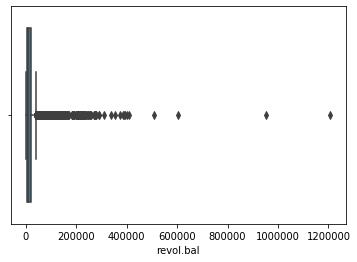

In [60]:
sns.boxplot(x=dataset['revol.bal'])
#dataset.boxplot()

In [61]:
dataset.shape

(9578, 14)

In [62]:
pd.crosstab(dataset['credit.policy'], dataset['not.fully.paid']) 

not.fully.paid,0,1
credit.policy,,
0,1349,519
1,6696,1014


In [63]:
pd.crosstab(dataset['credit.policy'], dataset['fico']) 

fico,612,617,622,627,632,637,642,647,652,657,...,782,787,792,797,802,807,812,817,822,827
credit.policy,,,,,,,,,,,,,,,,,,,,,
0,2,1,1,1,5,5,102,112,131,127,...,2,1,3,1,6,3,0,0,0,0
1,0,0,0,1,1,0,0,0,0,0,...,116,84,94,75,49,42,33,6,5,1


In [64]:
pd.crosstab(dataset['not.fully.paid'], dataset['fico']) 

fico,612,617,622,627,632,637,642,647,652,657,...,782,787,792,797,802,807,812,817,822,827
not.fully.paid,,,,,,,,,,,,,,,,,,,,,
0,2,0,1,1,2,3,73,75,93,88,...,111,78,94,72,48,43,33,6,4,1
1,0,1,0,1,4,2,29,37,38,39,...,7,7,3,4,7,2,0,0,1,0


In [65]:
pd.crosstab(dataset['credit.policy'], dataset['purpose_cat']) 

purpose_cat,0,1,2,3,4,5,6
credit.policy,,,,,,,
0,496,242,734,89,117,66,124
1,1835,1020,3223,254,512,371,495


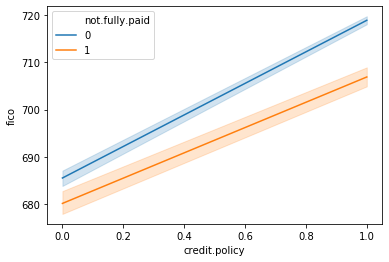

In [66]:
sns.lineplot(x=dataset['credit.policy'],y=dataset['fico'], hue=dataset['not.fully.paid'])

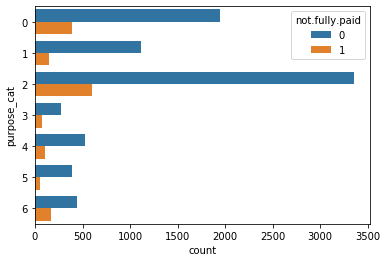

In [67]:
sns.countplot(y=dataset['purpose_cat'],hue=dataset['not.fully.paid'])

## Split data for model training

In [68]:
y = dataset['credit.policy']

In [69]:
X = dataset.drop(['credit.policy'], axis=1)

In [70]:
X.corrwith(y, axis = 0)

int.rate            -0.294089
installment          0.058770
log.annual.inc       0.034906
dti                 -0.090901
fico                 0.348319
days.with.cr.line    0.099026
revol.bal           -0.187518
revol.util          -0.104095
inq.last.6mths      -0.535511
delinq.2yrs         -0.076318
pub.rec             -0.054243
not.fully.paid      -0.158119
purpose_cat          0.017569
dtype: float64

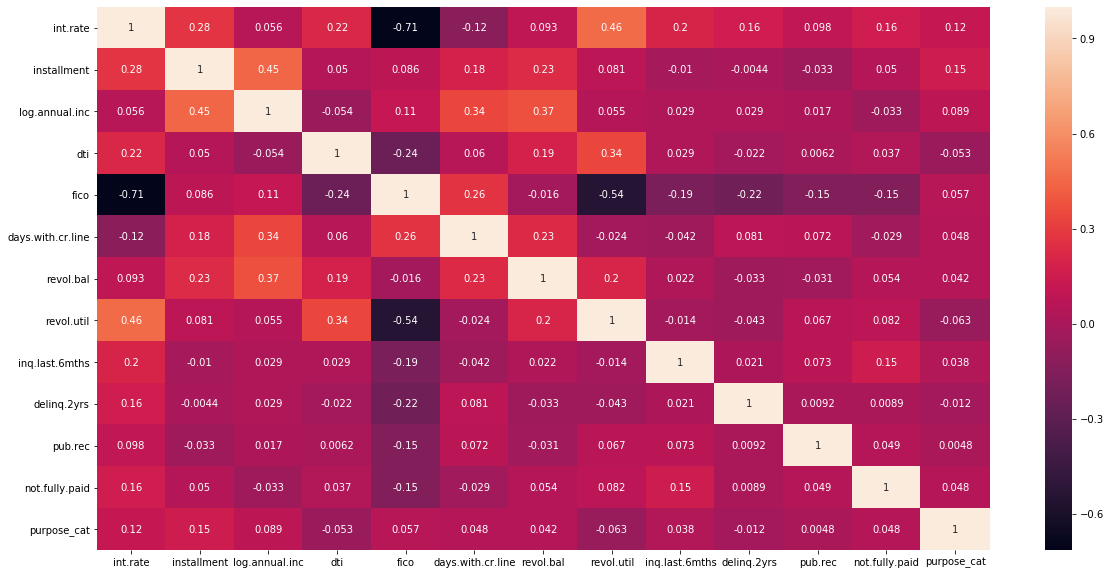

In [71]:
plt.figure(figsize=(20,10))
sns.heatmap(X.corr(method='pearson', min_periods=1), annot=True)

# Build Model

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.03,  random_state=100)

In [74]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import regularizers


#keras Sequential model is being used here
model = Sequential()

my_reg=regularizers.l1(0.01)

# We are using relu function as activation function for our neural network
model.add(Dense(13, input_dim=13, activation='relu'))
model.add(Dense(13, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Model Compilation
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
# One Epoch is when an entire dataset is passed forward and backward through the neural network only once.
# Total number of training examples present in a single batch.

model.fit(X_train, y_train, epochs=200, batch_size=10)

# Evaluation of model
scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/200
9290/9290 [==============================] - 1s 141us/step - loss: 2.9676 - accuracy: 0.8118
Epoch 2/200
9290/9290 [==============================] - 1s 102us/step - loss: 2.9164 - accuracy: 0.8153
Epoch 3/200
9290/9290 [==============================] - 1s 102us/step - loss: 2.9545 - accuracy: 0.8133
Epoch 4/200
9290/9290 [==============================] - 1s 96us/step - loss: 2.9209 - accuracy: 0.8140
Epoch 5/200
9290/9290 [==============================] - 1s 95us/step - loss: 2.8718 - accuracy: 0.8181
Epoch 6/200
9290/9290 [==============================] - 1s 95us/step - loss: 2.8455 - accuracy: 0.8198
Epoch 7/200
9290/9290 [==============================] - 1s 95us/step - loss: 2.8529 - accuracy: 0.8196
Epoch 8/200
9290/9290 [==============================] - 1s 103us/step - loss: 2.8459 - accuracy: 0.8194
Epoch 9/200
9290/9290 [==============================] - 1s 108us/step - loss: 2.8036 - accuracy: 0.8219
Epoch 10/200
9290/9290 [==============================] - 1

9290/9290 [==============================] - 1s 95us/step - loss: 0.2727 - accuracy: 0.8939
Epoch 79/200
9290/9290 [==============================] - 1s 101us/step - loss: 0.2668 - accuracy: 0.89610s -
Epoch 80/200
9290/9290 [==============================] - 1s 109us/step - loss: 0.2716 - accuracy: 0.8949
Epoch 81/200
9290/9290 [==============================] - 1s 95us/step - loss: 0.2593 - accuracy: 0.9015
Epoch 82/200
9290/9290 [==============================] - 1s 93us/step - loss: 0.2673 - accuracy: 0.8946
Epoch 83/200
9290/9290 [==============================] - 1s 95us/step - loss: 0.2745 - accuracy: 0.8970
Epoch 84/200
9290/9290 [==============================] - 1s 93us/step - loss: 0.2712 - accuracy: 0.8944
Epoch 85/200
9290/9290 [==============================] - 1s 94us/step - loss: 0.2716 - accuracy: 0.8948
Epoch 86/200
9290/9290 [==============================] - 1s 94us/step - loss: 0.2649 - accuracy: 0.8984
Epoch 87/200
9290/9290 [==============================] - 1s 9

9290/9290 [==============================] - 1s 94us/step - loss: 0.2522 - accuracy: 0.9025
Epoch 156/200
9290/9290 [==============================] - 1s 94us/step - loss: 0.2421 - accuracy: 0.9072
Epoch 157/200
9290/9290 [==============================] - 1s 94us/step - loss: 0.2441 - accuracy: 0.9047
Epoch 158/200
9290/9290 [==============================] - 1s 93us/step - loss: 0.2408 - accuracy: 0.9060
Epoch 159/200
9290/9290 [==============================] - 1s 94us/step - loss: 0.2440 - accuracy: 0.9060
Epoch 160/200
9290/9290 [==============================] - 1s 94us/step - loss: 0.2395 - accuracy: 0.9067
Epoch 161/200
9290/9290 [==============================] - 1s 93us/step - loss: 0.2465 - accuracy: 0.9057
Epoch 162/200
9290/9290 [==============================] - 1s 93us/step - loss: 0.2347 - accuracy: 0.9097
Epoch 163/200
9290/9290 [==============================] - 1s 94us/step - loss: 0.2411 - accuracy: 0.9062
Epoch 164/200
9290/9290 [==============================] - 1

# Comparing with RandomForest

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [76]:
clf = RandomForestClassifier(n_estimators=45, max_depth=23, min_samples_leaf=1, verbose=2, n_jobs=4)

In [77]:
clf.fit(X_train, y_train)

building tree 1 of 45building tree 2 of 45building tree 3 of 45
building tree 4 of 45


building tree 5 of 45
building tree 6 of 45
building tree 7 of 45building tree 8 of 45

building tree 9 of 45
building tree 10 of 45
building tree 11 of 45
building tree 12 of 45
building tree 13 of 45
building tree 14 of 45
building tree 15 of 45
building tree 16 of 45
building tree 17 of 45
building tree 18 of 45
building tree 19 of 45
building tree 20 of 45
building tree 21 of 45
building tree 22 of 45
building tree 23 of 45
building tree 24 of 45
building tree 25 of 45
building tree 26 of 45

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.



building tree 27 of 45
building tree 28 of 45building tree 29 of 45

building tree 30 of 45
building tree 31 of 45
building tree 32 of 45
building tree 33 of 45
building tree 34 of 45
building tree 35 of 45
building tree 36 of 45
building tree 37 of 45
building tree 38 of 45
building tree 39 of 45
building tree 40 of 45
building tree 41 of 45
building tree 42 of 45
building tree 43 of 45
building tree 44 of 45
building tree 45 of 45


[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  45 out of  45 | elapsed:    0.2s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=23, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=45, n_jobs=4,
                       oob_score=False, random_state=None, verbose=2,
                       warm_start=False)

In [78]:
RandomForestClassifier(max_depth=2, random_state=0)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [79]:
print(clf.feature_importances_)

[0.04155985 0.01669704 0.02004603 0.05768106 0.22637214 0.11530172
 0.07769317 0.02602172 0.40583655 0.00286598 0.00103595 0.00397631
 0.00491248]


In [80]:
predict = clf.predict(X_test)
print(predict)

[1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1
 1 0 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 0 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0
 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0
 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 0 0 0 1
 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0]


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  45 out of  45 | elapsed:    0.0s finished


In [81]:
print(accuracy_score(y_test, predict))

0.9930555555555556


In [82]:
clf.score(X_test, y_test, sample_weight=None)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  45 out of  45 | elapsed:    0.0s finished


0.9930555555555556

In [83]:
print(confusion_matrix(y_test, predict))

[[ 73   1]
 [  1 213]]


# Loading the inputs and labels

In [84]:
input_matrix = np.loadtxt("input.csv", delimiter=",", ndmin=2).astype(np.float32)
input_matrix.shape

(9578, 18)

In [85]:
labels = np.loadtxt("output.csv", delimiter=",", ndmin=2).astype(np.float32)
labels.shape

(9578, 2)

In [86]:
from math import floor,ceil

In [87]:
train_size = 0.75
#we have used 75% of total data as training set
train_cnt = floor(input_matrix.shape[0] * train_size)
x_train = input_matrix[0:train_cnt]
y_train = labels[0:train_cnt]
x_test = input_matrix[train_cnt:]
y_test = labels[train_cnt:]

In [88]:
import keras
from keras.models import Sequential
from keras.layers import Dense

np.random.seed(777)

#keras Sequential model is being used here
model = Sequential()

# For 2D layers, such as Dense we specify input shape via the argument input_dim,
# For 3D  layers we use the arguments input_dim and input_length
# We are using relu function as activation function for our neural network
model.add(Dense(12, input_dim=18, activation='relu'))
model.add(Dense(18, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

# Model Compilation
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
# One Epoch is when an entire dataset is passed forward and backward through the neural network only once.
# Total number of training examples present in a single batch.

model.fit(x_train, y_train, epochs=200, batch_size=10)

# Evaluation of model
scores = model.evaluate(x_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/200
7183/7183 [==============================] - 1s 149us/step - loss: 7.5388 - accuracy: 0.5265
Epoch 2/200
7183/7183 [==============================] - 1s 98us/step - loss: 1.0469 - accuracy: 0.9346
Epoch 3/200
7183/7183 [==============================] - 1s 119us/step - loss: 1.0467 - accuracy: 0.9347
Epoch 4/200
7183/7183 [==============================] - 1s 108us/step - loss: 1.0467 - accuracy: 0.9347
Epoch 5/200
7183/7183 [==============================] - 1s 99us/step - loss: 1.0467 - accuracy: 0.9347
Epoch 6/200
7183/7183 [==============================] - 1s 98us/step - loss: 1.0467 - accuracy: 0.9347
Epoch 7/200
7183/7183 [==============================] - 1s 100us/step - loss: 1.0467 - accuracy: 0.9347
Epoch 8/200
7183/7183 [==============================] - 1s 99us/step - loss: 1.0467 - accuracy: 0.9347
Epoch 9/200
7183/7183 [==============================] - 1s 104us/step - loss: 1.0467 - accuracy: 0.9347
Epoch 10/200
7183/7183 [==============================] - 1

7183/7183 [==============================] - 1s 99us/step - loss: 1.0467 - accuracy: 0.9347
Epoch 79/200
7183/7183 [==============================] - 1s 96us/step - loss: 1.0467 - accuracy: 0.9347
Epoch 80/200
7183/7183 [==============================] - 1s 97us/step - loss: 1.0467 - accuracy: 0.9347
Epoch 81/200
7183/7183 [==============================] - 1s 98us/step - loss: 1.0467 - accuracy: 0.9347
Epoch 82/200
7183/7183 [==============================] - 1s 96us/step - loss: 1.0467 - accuracy: 0.9347
Epoch 83/200
7183/7183 [==============================] - 1s 97us/step - loss: 1.0467 - accuracy: 0.9347
Epoch 84/200
7183/7183 [==============================] - 1s 98us/step - loss: 1.0467 - accuracy: 0.9347
Epoch 85/200
7183/7183 [==============================] - 1s 97us/step - loss: 1.0467 - accuracy: 0.9347
Epoch 86/200
7183/7183 [==============================] - 1s 116us/step - loss: 1.0467 - accuracy: 0.9347
Epoch 87/200
7183/7183 [==============================] - 1s 110us/

7183/7183 [==============================] - 1s 97us/step - loss: 1.0467 - accuracy: 0.9347
Epoch 156/200
7183/7183 [==============================] - 1s 102us/step - loss: 1.0467 - accuracy: 0.9347
Epoch 157/200
7183/7183 [==============================] - 1s 120us/step - loss: 1.0467 - accuracy: 0.9347
Epoch 158/200
7183/7183 [==============================] - 1s 99us/step - loss: 1.0467 - accuracy: 0.9347
Epoch 159/200
7183/7183 [==============================] - 1s 97us/step - loss: 1.0467 - accuracy: 0.9347
Epoch 160/200
7183/7183 [==============================] - 1s 98us/step - loss: 1.0467 - accuracy: 0.9347
Epoch 161/200
7183/7183 [==============================] - 1s 97us/step - loss: 1.0467 - accuracy: 0.9347
Epoch 162/200
7183/7183 [==============================] - 1s 97us/step - loss: 1.0467 - accuracy: 0.9347
Epoch 163/200
7183/7183 [==============================] - 1s 97us/step - loss: 1.0467 - accuracy: 0.9347
Epoch 164/200
7183/7183 [==============================] -

In [89]:
#model score
predictions = model.predict(x_test)
y_rounded = [round(x[0]) for x in predictions]
scores_test = model.evaluate(x_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores_test[1]*100))

2395/2395 [==============================] - 0s 15us/step

accuracy: 93.74%
